## Telecom Churn Case Study

We need to forecast if a specific customer will migrate to another TelecomDf provider or not using 21 predictor variables. This is referred to as churning and not churning, respectively, in TelecomDf jargon.

### Importing and Merging Data

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
%matplotlib inline
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### Loading All the datasets: churn_data, customer_data and internet_data

In [449]:
churn_data=pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [450]:
customer_data=pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [451]:
internet_data=pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


### Joining all data files into one dataframe

In [452]:
#Using customerID as the primary key we are combining other datasets
combinedDf=pd.merge(churn_data,customer_data,how='inner',on='customerID')

In [453]:
#Final dataset, combining all the datasets with customerID as the common point
TelecomDf=pd.merge(combinedDf,internet_data,how='inner',on='customerID')

### Looking into the Dataframe

In [454]:
TelecomDf.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [455]:
# Let's check the dimensions of the dataframe
TelecomDf.shape

(7043, 21)

In [456]:
# let's look at the statistical aspects of the dataframe
TelecomDf.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [457]:
# Let's see the type of each column
TelecomDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Data Preparation
Converting some binary variables (Yes/No) to 0/1

In [458]:
CatgoricalVariable = ['PaperlessBilling','Churn','Partner','Dependents', 'PhoneService']

def CovertToNumeric(x):
    return x.map({'Yes':1,'No':0})

TelecomDf[CatgoricalVariable] = TelecomDf[CatgoricalVariable].apply(CovertToNumeric)

In [459]:
TelecomDf.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


### Create dummies for the Categorical variables. 

In [460]:
# Create dummy variable and dropping the first one.
TempDummy=pd.get_dummies(TelecomDf[['Contract', 'PaymentMethod', 'gender', 'InternetService']],drop_first=True)
ml=pd.get_dummies(TelecomDf['MultipleLines'],prefix='MultipleLines')
os=pd.get_dummies(TelecomDf['OnlineSecurity'],prefix='OnlineSecurity')
ob=pd.get_dummies(TelecomDf['OnlineBackup'], prefix='OnlineBackup')
dp = pd.get_dummies(TelecomDf['DeviceProtection'], prefix='DeviceProtection')
st =pd.get_dummies(TelecomDf['StreamingTV'], prefix='StreamingTV')
sm = pd.get_dummies(TelecomDf['StreamingMovies'], prefix='StreamingMovies')

# Drop one of the column in the dummies which are not needed
ml1=ml.drop(['MultipleLines_No phone service'],1)
os1=os.drop(['OnlineSecurity_No internet service'],1)
ob1=ob.drop(['OnlineBackup_No internet service'],1)
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
st1 = st.drop(['StreamingTV_No internet service'], 1)
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)

# Adding above dataframe to the TelecomDf
TelecomDf=pd.concat([TelecomDf,TempDummy],axis=1)
TelecomDf=pd.concat([TelecomDf,ml1],axis=1)
TelecomDf=pd.concat([TelecomDf,os1],axis=1)
TelecomDf = pd.concat([TelecomDf,dp1], axis=1)
TelecomDf = pd.concat([TelecomDf,ob1], axis=1)
TelecomDf = pd.concat([TelecomDf,st1], axis=1)
TelecomDf = pd.concat([TelecomDf,sm1], axis=1)

In [461]:
TelecomDf.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,1,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,0,1,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,0,1,1,0,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


### Drop the orginal columns where we created the dummy variables

In [462]:
# We have created dummies for the below variables, so we can drop them
TelecomDf = TelecomDf.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [463]:
#Convert Variable from string to float
TelecomDf['TotalCharges'] =TelecomDf['TotalCharges'].apply(pd.to_numeric, errors='coerce') 

In [464]:
TelecomDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

### Checking for Outliers

In [465]:
# Checking for outliers in the continuous variables
Telecom_Outliner = TelecomDf[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [466]:
Telecom_Outliner.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

### Check for Missing Values

In [467]:
TelecomDf.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
DeviceProtection_No             

In [468]:
# Removing NaN TotalCharges rows
TelecomDf.dropna(inplace=True)

In [469]:
TelecomDf.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
DeviceProtection_No                      0
DeviceProte

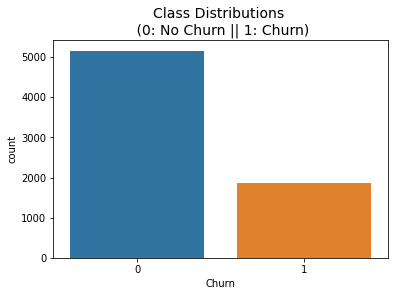

In [470]:
sns.countplot('Churn', data=TelecomDf)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)
plt.show()

In [471]:
TelecomDf['Churn'].sum()

1869

### Out of 7043 samples we have 1869 values of churn which is very less

In [472]:
TelecomDfOrginal = TelecomDf

ChurnDf = TelecomDf.loc[TelecomDf['Churn'] == 1]
NonChurnDf = TelecomDf.loc[TelecomDf['Churn'] == 0][:1869]

TelecomDf = pd.concat([ChurnDf, NonChurnDf])

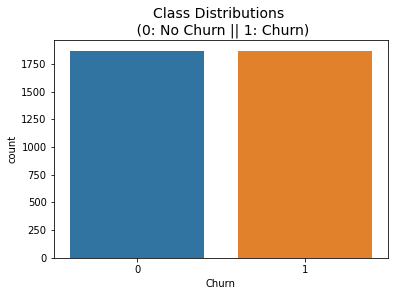

In [473]:
sns.countplot('Churn', data=TelecomDf)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)
plt.show()

In [474]:
TelecomDf['TotalCharges'].head()

2      108.15
4      151.65
5      820.50
8     3046.05
13    5036.30
Name: TotalCharges, dtype: float64

After removing NaN values

### Test-Train Split

In [475]:
from sklearn.model_selection import train_test_split

In [476]:
# All Independent variable and remove customerID(which is not necessary)
X=TelecomDf.drop(['Churn','customerID'],axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
5,8,1,1,99.65,820.50,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
8,28,1,1,104.80,3046.05,0,1,0,0,0,...,1,0,0,1,1,0,0,1,0,1
13,49,1,1,103.70,5036.30,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,1


In [477]:
# Dependent variable in y
y=TelecomDf['Churn']
y.head()

2     1
4     1
5     1
8     1
13    1
Name: Churn, dtype: int64

In [478]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## Feature Scaling

In [479]:
from sklearn.preprocessing import StandardScaler

In [480]:
scaler=StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
1133,-1.074309,1,0,-1.708938,-0.921905,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3845,-0.991608,1,1,0.186408,-0.816699,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2149,0.745117,1,1,1.129746,1.171375,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,1
2431,-1.074309,0,1,-1.528594,-0.922290,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1748,1.075921,1,0,-1.681193,-0.444949,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Looking at Correlations

In [481]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

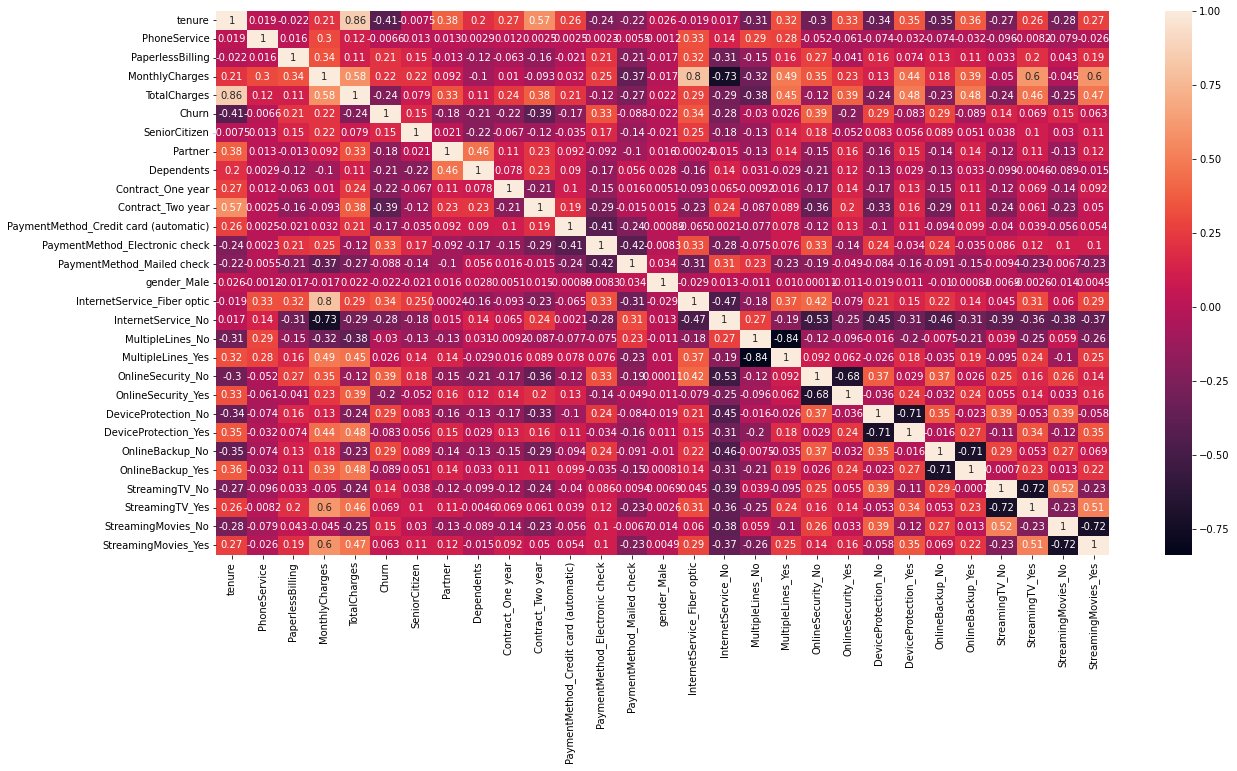

In [482]:
# Let's see the correlation matrix 
plt.figure(figsize=(20,10))
sns.heatmap(TelecomDf.corr(),annot=True)
plt.show()

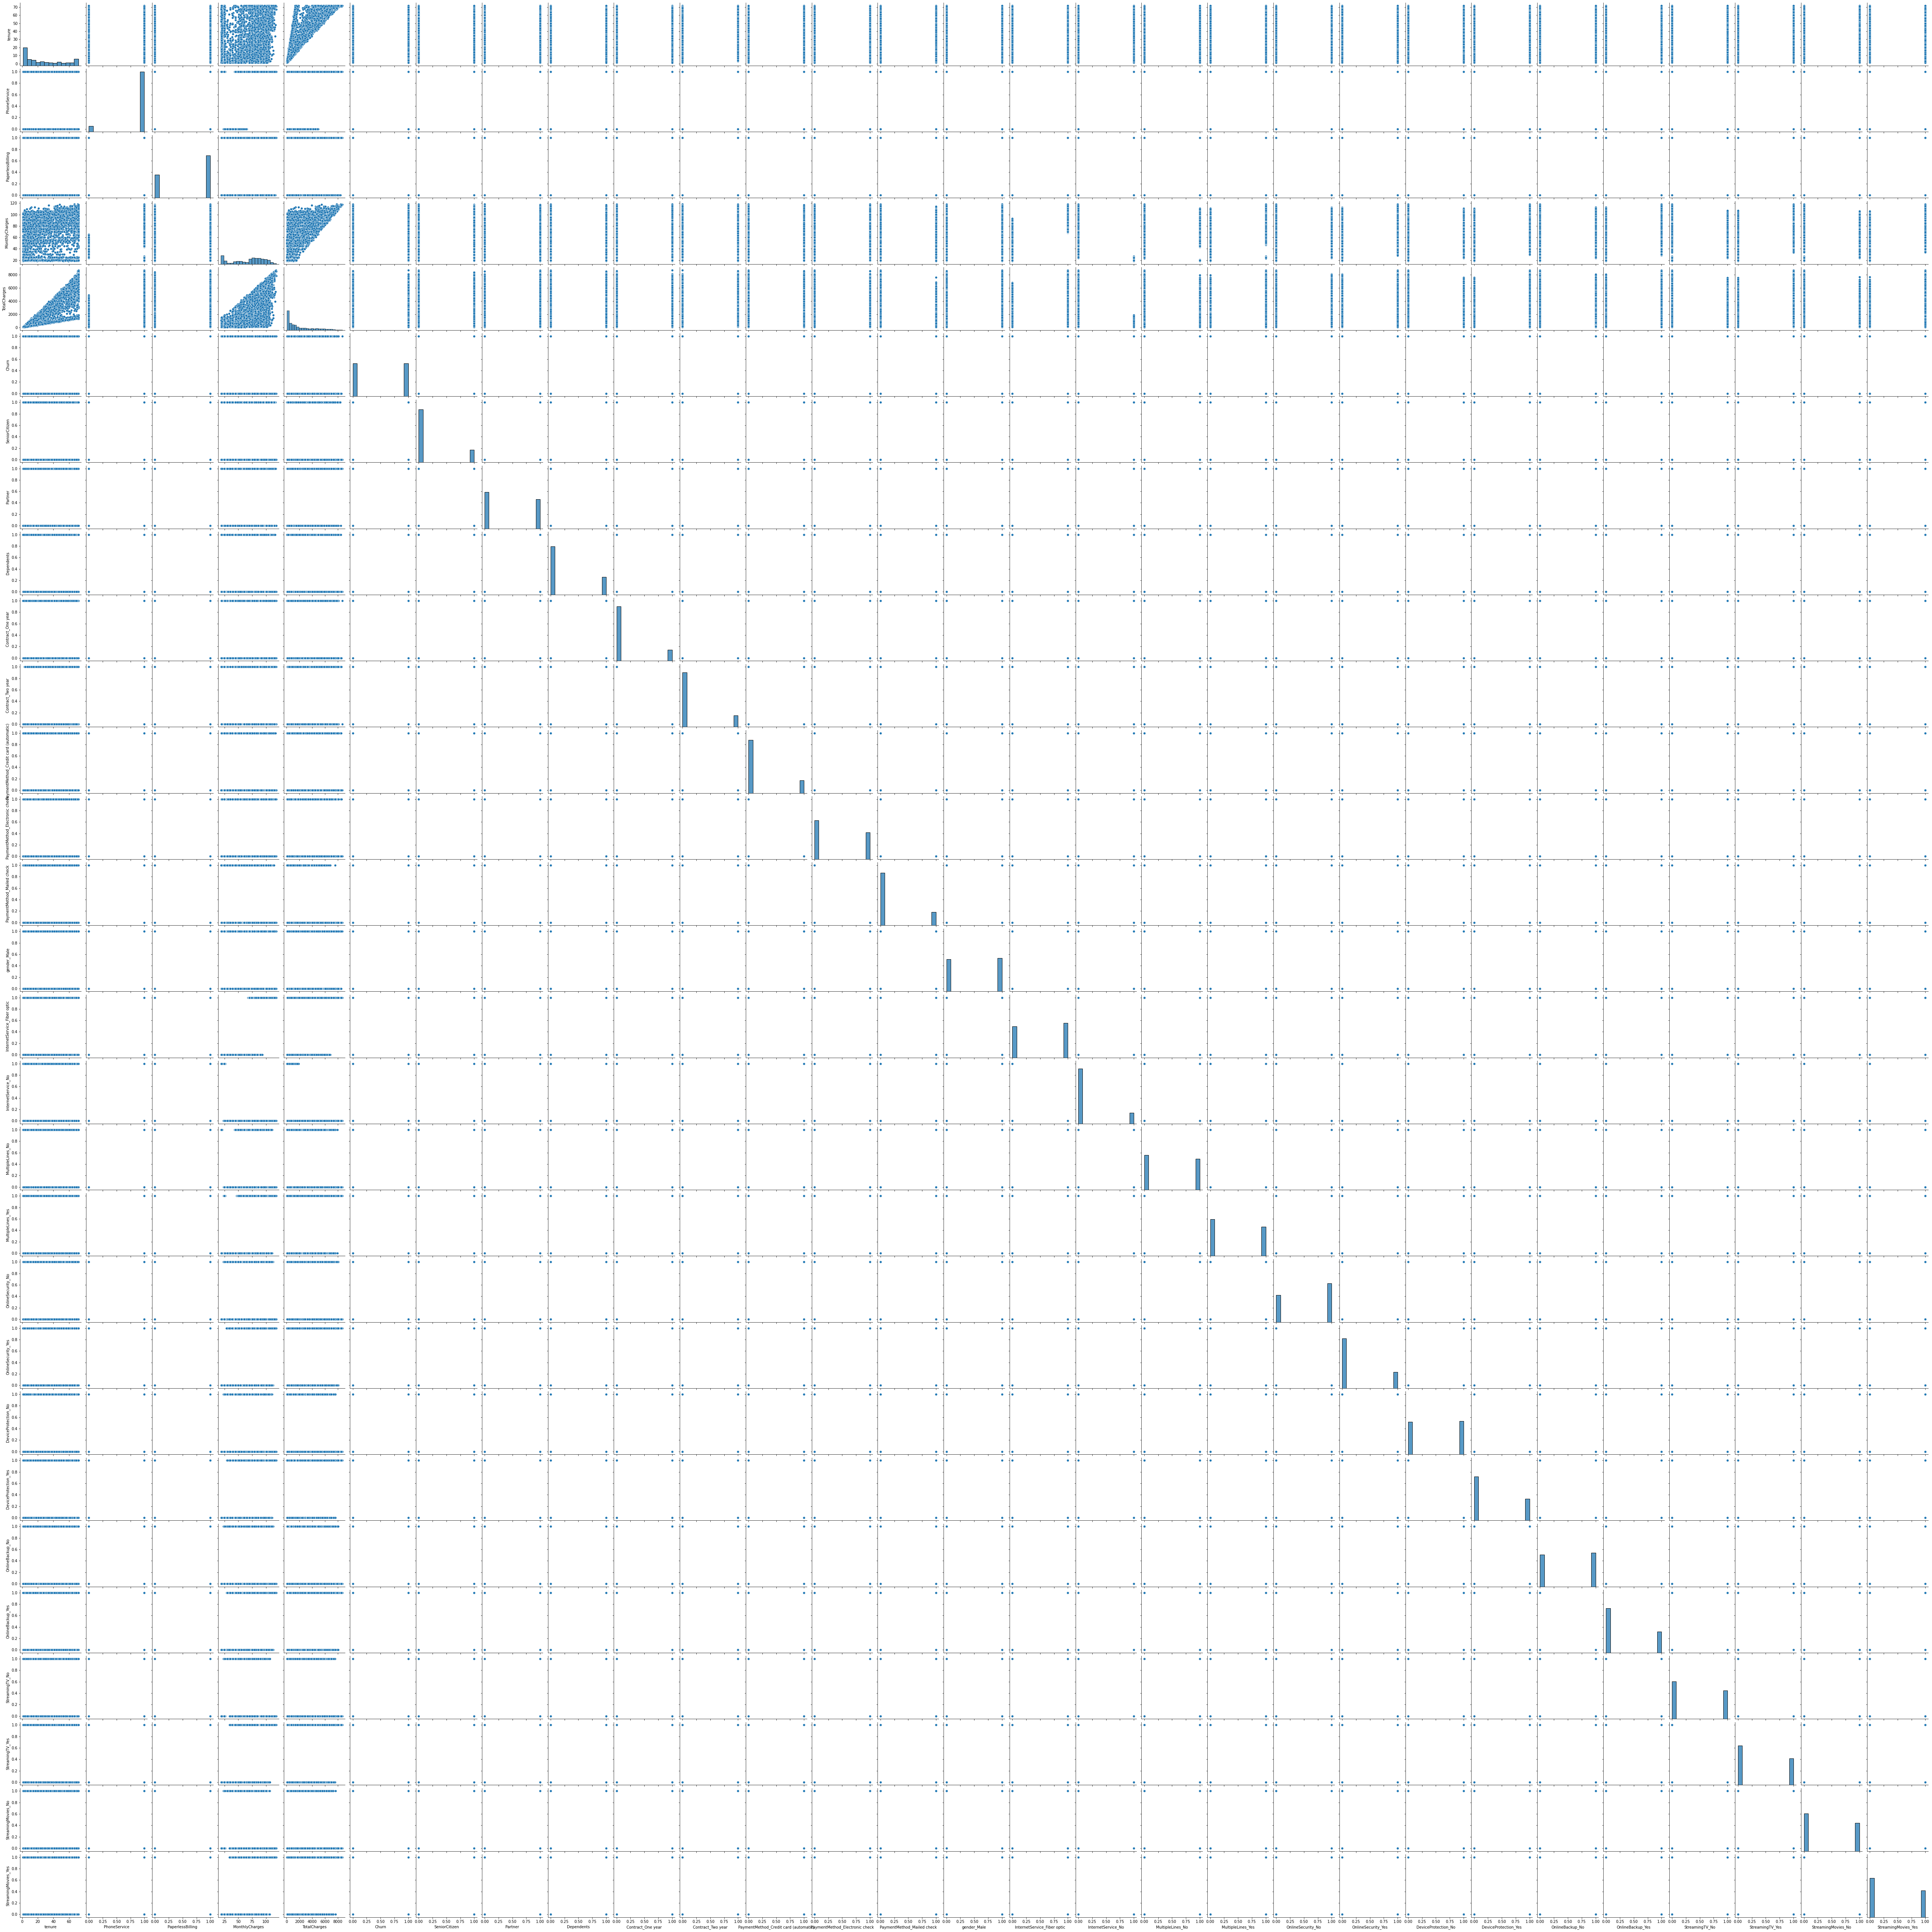

In [563]:
sns.pairplot(data=TelecomDf)

### Dropping highly correlated dummy variables

In [483]:
X_test=X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                       'StreamingTV_No','StreamingMovies_No'],1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

### Checking the Correlation Matrix
After dropping highly correlated variables now let's check the correlation matrix again.

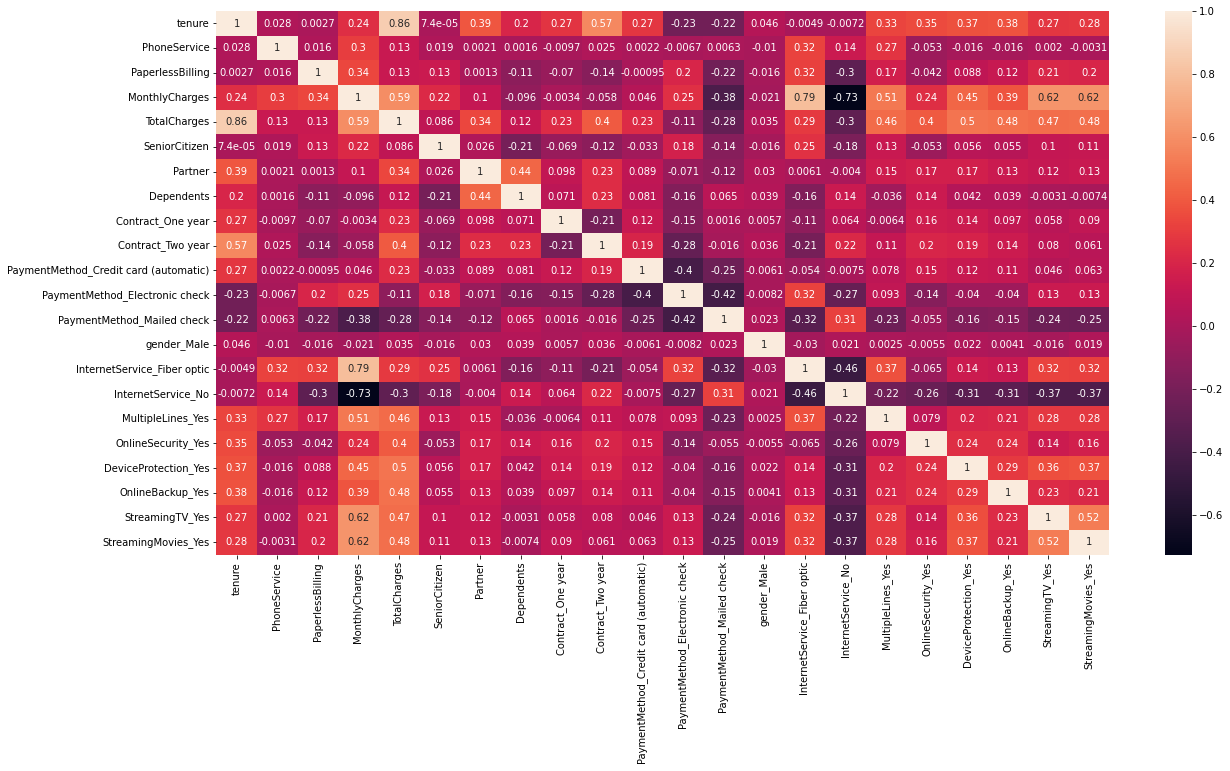

In [484]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

## Feature Selection Using RFE

In [485]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [486]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg)
rfe=rfe.fit(X_train,y_train)

In [487]:
rfe.support_

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False])

In [488]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 3),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', False, 5),
 ('Partner', False, 9),
 ('Dependents', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 7),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 11),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', False, 6),
 ('OnlineSecurity_Yes', True, 1),
 ('DeviceProtection_Yes', False, 10),
 ('OnlineBackup_Yes', False, 12),
 ('StreamingTV_Yes', False, 4),
 ('StreamingMovies_Yes', False, 2)]

In [489]:
col=X_train.columns[rfe.support_]

In [490]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'SeniorCitizen', 'Partner',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'DeviceProtection_Yes',
       'OnlineBackup_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

## Designing Model

In [491]:
import statsmodels.api as sm

In [492]:
#Logistic regression model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2616
Model:                            GLM   Df Residuals:                     2593
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1283.4
Date:                Sun, 11 Dec 2022   Deviance:                       2566.8
Time:                        19:40:18   Pearson chi2:                 2.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3330
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3566      0.983     -2.396      0.017      -4.284      -0.429
tenure                                   -1.4936      0.205     -7.302      0.000      -1.895      -1.093
PhoneService                              0.4091      0.503      0.813      0.416      -0.577       1.395
PaperlessBilling                          0.3588      0.110      3.253      0.001       0.143       0.575
MonthlyCharges                           -1.9351      0.650     -2.979      0.003      -3.208      -0.662
TotalCharges                              1.0000      0.214      4.677      0.000       0.581       1.419
SeniorCitizen                             0.1967      0.129      1.528      0.127      -0.056       0.449
Partner                                  -0.0550      0.117     -0.471      0.638      -0.284       0.174
Dependents                               -0.4814      0.131     -3.675      0.000      -0.738      -0.225
Contract_One year                        -0.5900      0.153     -3.861      0.000      -0.889      -0.290
Contract_Two year                        -1.6041      0.240     -6.681      0.000      -2.075      -1.134
PaymentMethod_Credit card (automatic)    -0.1434      0.161     -0.888      0.374      -0.460       0.173
PaymentMethod_Electronic check            0.3520      0.139      2.541      0.011       0.081       0.623
PaymentMethod_Mailed check                0.0087      0.168      0.052      0.959      -0.321       0.339
gender_Male                               0.0785      0.098      0.805      0.421      -0.113       0.270
InternetService_Fiber optic               2.3113      0.558      4.142      0.000       1.218       3.405
InternetService_No                       -2.3137      0.625     -3.703      0.000      -3.538      -1.089
MultipleLines_Yes                         0.4040      0.162      2.489      0.013       0.086       0.722
OnlineSecurity_Yes                       -0.0294      0.171     -0.172      0.864      -0.365       0.306
DeviceProtection_Yes                      0.2361      0.166      1.419      0.156      -0.090       0.562
OnlineBackup_Yes                          0.2008      0.162      1.243      0.214      -0.116       0.517
StreamingTV_Yes                           0.7888      0.263      2.998      0.003       0.273       1.305
StreamingMovies_Yes                       0.8478      0.258      3.282      0.001       0.341       1.354
=========================================================================================================
"""

### Assessing the model with StatsModels

In [493]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2616
Model:                            GLM   Df Residuals:                     2604
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1293.2
Date:                Sun, 11 Dec 2022   Deviance:                       2586.3
Time:                        19:40:19   Pearson chi2:                 2.84e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3280
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.5547      0.208      2.662      0.008       0.146       0.963
tenure                            -1.5043      0.191     -7.872      0.000      -1.879      -1.130
PhoneService                      -0.9822      0.202     -4.874      0.000      -1.377      -0.587
PaperlessBilling                   0.3677      0.109      3.376      0.001       0.154       0.581
TotalCharges                       1.0060      0.189      5.326      0.000       0.636       1.376
Dependents                        -0.5231      0.116     -4.510      0.000      -0.750      -0.296
Contract_One year                 -0.6496      0.148     -4.383      0.000      -0.940      -0.359
Contract_Two year                 -1.7245      0.236     -7.314      0.000      -2.187      -1.262
PaymentMethod_Electronic check     0.4497      0.104      4.341      0.000       0.247       0.653
InternetService_Fiber optic        0.7514      0.141      5.343      0.000       0.476       1.027
InternetService_No                -0.5324      0.182     -2.919      0.004      -0.890      -0.175
OnlineSecurity_Yes                -0.4082      0.122     -3.340      0.001      -0.648      -0.169
==================================================================================================
"""

In [494]:
#Getting the predicted values on the train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

1133    0.311233
3845    0.859526
2149    0.633950
2431    0.833500
1748    0.008573
511     0.645104
657     0.135182
6009    0.756320
3759    0.791640
1511    0.003716
dtype: float64

In [495]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31123289, 0.85952572, 0.63395038, 0.83350048, 0.00857255,
       0.64510414, 0.13518151, 0.75632014, 0.79163979, 0.00371586])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [496]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.311233,1133
1,1,0.859526,3845
2,0,0.633950,2149
3,1,0.833500,2431
4,0,0.008573,1748


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [497]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

#Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.311233,1133,0
1,1,0.859526,3845,1
2,0,0.633950,2149,1
3,1,0.833500,2431,1
4,0,0.008573,1748,0


In [498]:
from sklearn import metrics

In [499]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[ 933  389]
 [ 245 1049]]


In [500]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [501]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7576452599388379


### Checking VIFs

In [502]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [503]:
#Create a dataframe that will contain a list of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,PhoneService,7.74
0,tenure,7.43
3,TotalCharges,7.20
8,InternetService_Fiber optic,4.32
2,PaperlessBilling,2.89
6,Contract_Two year,2.67
9,InternetService_No,2.45
7,PaymentMethod_Electronic check,2.01
5,Contract_One year,1.75
10,OnlineSecurity_Yes,1.73


In [504]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [505]:
y_train_pred[:10]

array([0.31123289, 0.85952572, 0.63395038, 0.83350048, 0.00857255,
       0.64510414, 0.13518151, 0.75632014, 0.79163979, 0.00371586])

In [506]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [507]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.311233,1133,0
1,1,0.859526,3845,1
2,0,0.633950,2149,1
3,1,0.833500,2431,1
4,0,0.008573,1748,0


In [508]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.7576452599388379


So overall the accuracy hasn't dropped much

**Let's check the VIFs again**

In [509]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,PhoneService,7.74
0,tenure,7.43
3,TotalCharges,7.20
8,InternetService_Fiber optic,4.32
2,PaperlessBilling,2.89
6,Contract_Two year,2.67
9,InternetService_No,2.45
7,PaymentMethod_Electronic check,2.01
5,Contract_One year,1.75
10,OnlineSecurity_Yes,1.73


In [510]:
# Let's drop TotalCharges since it has a high VIF
col=col.drop('TotalCharges')
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes'],
      dtype='object')

In [511]:
# Let's re-run the model using the selected variables
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2616
Model:                            GLM   Df Residuals:                     2605
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1308.8
Date:                Sun, 11 Dec 2022   Deviance:                       2617.6
Time:                        19:40:19   Pearson chi2:                 2.60e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3199
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1949      0.188      1.038      0.299      -0.173       0.563
tenure                            -0.5854      0.071     -8.190      0.000      -0.725      -0.445
PhoneService                      -0.7079      0.184     -3.851      0.000      -1.068      -0.348
PaperlessBilling                   0.3887      0.108      3.608      0.000       0.178       0.600
Dependents                        -0.5207      0.115     -4.520      0.000      -0.747      -0.295
Contract_One year                 -0.6067      0.145     -4.185      0.000      -0.891      -0.323
Contract_Two year                 -1.5709      0.227     -6.906      0.000      -2.017      -1.125
PaymentMethod_Electronic check     0.4370      0.103      4.227      0.000       0.234       0.640
InternetService_Fiber optic        1.0823      0.127      8.550      0.000       0.834       1.330
InternetService_No                -0.6793      0.175     -3.878      0.000      -1.023      -0.336
OnlineSecurity_Yes                -0.3250      0.121     -2.682      0.007      -0.563      -0.087
==================================================================================================
"""

In [512]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [513]:
y_train_pred[:10]

array([0.25272339, 0.87819812, 0.58712636, 0.77074434, 0.03251373,
       0.56727205, 0.13508303, 0.68770465, 0.81242465, 0.02104759])

In [514]:
y_train_pred_final['Churn_Prob']=y_train_pred

In [515]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.252723,1133,0
1,1,0.878198,3845,1
2,0,0.587126,2149,1
3,1,0.770744,2431,1
4,0,0.032514,1748,0


In [516]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.7503822629969419


The accuracy is still practically the same.

**Let's now check the VIFs again**

In [517]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,PhoneService,7.74
7,InternetService_Fiber optic,3.79
2,PaperlessBilling,2.88
5,Contract_Two year,2.65
0,tenure,2.09
8,InternetService_No,2.08
6,PaymentMethod_Electronic check,1.98
4,Contract_One year,1.75
9,OnlineSecurity_Yes,1.71
3,Dependents,1.47


### Metrics beyond simply accuracy

Accuracy of overall model: 0.7503822629969419
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1322
           1       0.73      0.79      0.76      1294

    accuracy                           0.75      2616
   macro avg       0.75      0.75      0.75      2616
weighted avg       0.75      0.75      0.75      2616



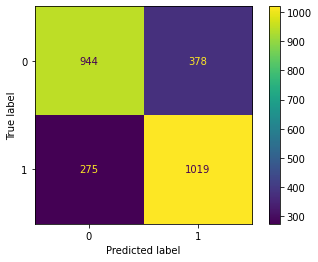

In [518]:
print("Accuracy of overall model: "+str(accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))) #print('\n')
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))
cm = confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Plotting the ROC Curve


In [519]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'% auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [520]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob,drop_intermediate=False)

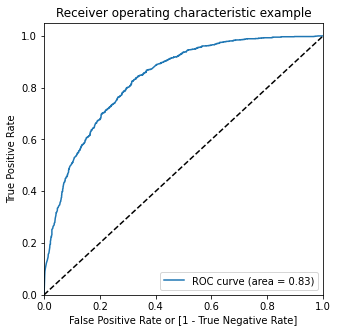

In [521]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

## Optimal Cutoff Point
Get a proper threshold value for the telecom churn.

In [522]:
# Let's create columns with different probability cutoffs 
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x :1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.252723,1133,0,1,1,1,0,0,0,0,0,0,0
1,1,0.878198,3845,1,1,1,1,1,1,1,1,1,1,0
2,0,0.587126,2149,1,1,1,1,1,1,1,0,0,0,0
3,1,0.770744,2431,1,1,1,1,1,1,1,1,1,0,0
4,0,0.032514,1748,0,1,0,0,0,0,0,0,0,0,0


In [523]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i]=[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.494648  1.000000  0.000000
0.1   0.1  0.628058  0.988408  0.275340
0.2   0.2  0.694954  0.961360  0.434191
0.3   0.3  0.722095  0.918856  0.529501
0.4   0.4  0.746177  0.859351  0.635401
0.5   0.5  0.750382  0.787481  0.714070
0.6   0.6  0.745031  0.693199  0.795764
0.7   0.7  0.718272  0.561824  0.871407
0.8   0.8  0.652141  0.355487  0.942511
0.9   0.9  0.505352  0.000000  1.000000


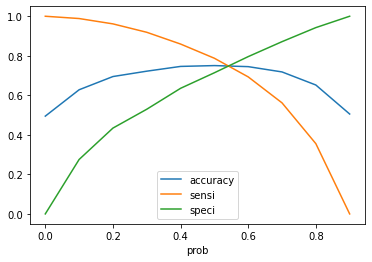

In [524]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.5 is the optimum point to take it as a cutoff probability which is a default done in above model

In [525]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       1
 4       0
        ..
 2611    0
 2612    1
 2613    1
 2614    0
 2615    1
 Name: Churn, Length: 2616, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 2611    1
 2612    1
 2613    1
 2614    0
 2615    1
 Name: predicted, Length: 2616, dtype: int64)

In [526]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

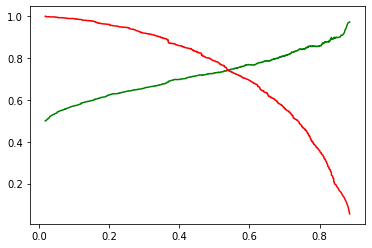

In [527]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [528]:
X_test=X_test[col]
X_test.head()

,tenure,PhoneService,PaperlessBilling,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes
4314,24,1,1,0,0,0,1,1,0,0
1524,63,1,1,0,0,0,0,1,0,0
4520,1,1,0,1,0,0,0,0,1,0
6641,16,1,1,0,0,0,1,0,0,1
3743,4,1,0,1,0,0,1,0,0,1


In [529]:
X_test_sm=sm.add_constant(X_test)

Making predictions on the test set

In [530]:
y_test_pred=res.predict(X_test_sm)

In [531]:
y_test_pred[:10]

4314    3.195105e-06
1524    2.511764e-16
4520    9.125719e-02
6641    8.453770e-05
3743    3.685528e-02
75      6.249542e-15
2162    1.345796e-07
4089    2.036581e-02
6202    6.422549e-07
1097    5.762542e-07
dtype: float64

In [532]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
4314,3.195105e-06
1524,2.511764e-16
4520,9.125719e-02
6641,8.453770e-05
3743,3.685528e-02


In [533]:
# Converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)

In [534]:
# Putting CustID to index
y_test_df['CustID']=y_test_df.index

In [535]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [536]:
# Appending y_test_df and y_pred_1
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [537]:
y_pred_final.head()

,Churn,CustID,0
0,1,4314,3.195105e-06
1,0,1524,2.511764e-16
2,1,4520,9.125719e-02
3,1,6641,8.453770e-05
4,1,3743,3.685528e-02


In [538]:
# Renaming the column 
y_pred_final=y_pred_final.rename(columns={0:'Churn_Prob'})

In [539]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,1,4314,3.195105e-06
1,0,1524,2.511764e-16
2,1,4520,9.125719e-02
3,1,6641,8.453770e-05
4,1,3743,3.685528e-02


In [540]:
y_pred_final['final_predicted']=y_pred_final.Churn_Prob.map(lambda x:1 if x>0.42 else 0)

In [541]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,1,4314,3.195105e-06,0
1,0,1524,2.511764e-16,0
2,1,4520,9.125719e-02,0
3,1,6641,8.453770e-05,0
4,1,3743,3.685528e-02,0


In [542]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.final_predicted)

0.5641711229946524

Accuracy of overall model: 0.5641711229946524
              precision    recall  f1-score   support

           0       0.53      0.97      0.69       547
           1       0.87      0.18      0.29       575

    accuracy                           0.56      1122
   macro avg       0.70      0.57      0.49      1122
weighted avg       0.70      0.56      0.48      1122



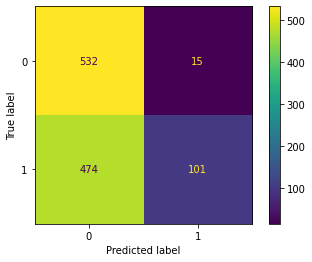

In [543]:
print("Accuracy of overall model: "+str(accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))) #print('\n')
print(classification_report(y_pred_final.Churn, y_pred_final.final_predicted))
cm = confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Random Forest

In [544]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

In [545]:
model_rf.fit(X_train_sm, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [546]:
# Make predictions
prediction_test = model_rf.predict(X_test_sm)
print (metrics.accuracy_score(y_test, prediction_test))

0.6800356506238859


<AxesSubplot: >

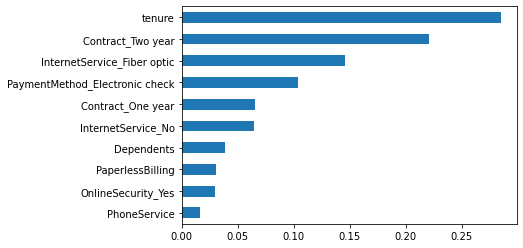

In [547]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X_test_sm.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Accuracy of overall model: 0.6800356506238859
              precision    recall  f1-score   support

           0       0.62      0.90      0.73       547
           1       0.83      0.47      0.60       575

    accuracy                           0.68      1122
   macro avg       0.72      0.69      0.67      1122
weighted avg       0.73      0.68      0.67      1122



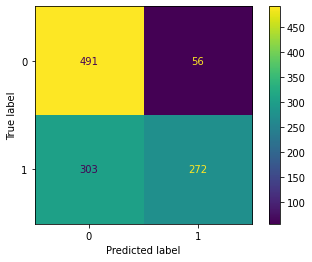

In [548]:
print("Accuracy of overall model: "+str(accuracy_score(y_test, prediction_test)))
print(classification_report(y_test, prediction_test))
cm = confusion_matrix(y_test, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [549]:
fpr,tpr,thresholds=metrics.roc_curve(y_test, prediction_test,drop_intermediate=False)

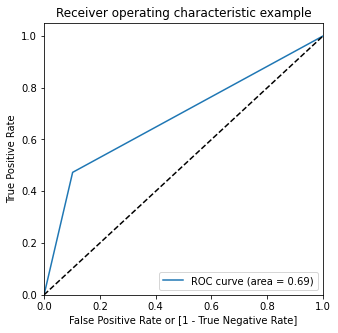

In [550]:
draw_roc(y_test, prediction_test)

## Support Vector Machine(SVM)

In [551]:
from sklearn.svm import SVC

modelSVM = SVC(kernel='linear') 
modelSVM.fit(X_train_sm,y_train)
preds = modelSVM.predict(X_test_sm)
metrics.accuracy_score(y_test, preds)

0.7700534759358288

Accuracy of overall model: 0.7700534759358288
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       547
           1       0.74      0.86      0.79       575

    accuracy                           0.77      1122
   macro avg       0.78      0.77      0.77      1122
weighted avg       0.78      0.77      0.77      1122



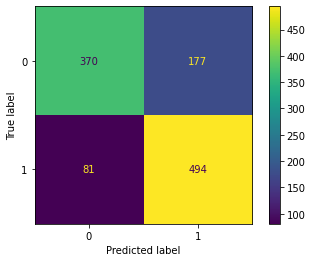

In [552]:
print("Accuracy of overall model: "+str(accuracy_score(y_test, preds))) #print('\n')
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [553]:
fpr,tpr,thresholds=metrics.roc_curve(y_test, preds,drop_intermediate=False)

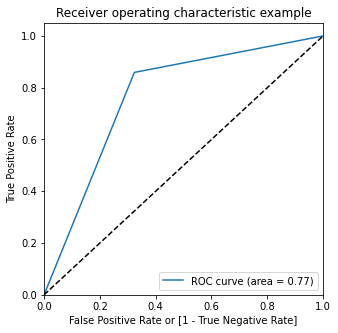

In [554]:
draw_roc(y_test, preds)

## AdaBoostClassifier

In [555]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train_sm,y_train)
preds = model.predict(X_test_sm)
metrics.accuracy_score(y_test, preds)

0.6443850267379679

Accuracy of overall model: 0.6443850267379679
              precision    recall  f1-score   support

           0       0.58      0.94      0.72       547
           1       0.87      0.36      0.51       575

    accuracy                           0.64      1122
   macro avg       0.73      0.65      0.62      1122
weighted avg       0.73      0.64      0.61      1122



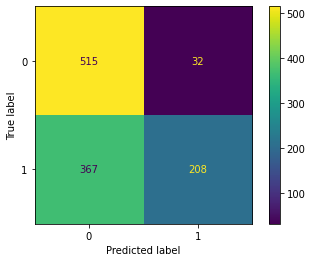

In [556]:
print("Accuracy of overall model: "+str(accuracy_score(y_test, preds))) #print('\n')
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [557]:
fpr,tpr,thresholds=metrics.roc_curve(y_test, preds,drop_intermediate=False)

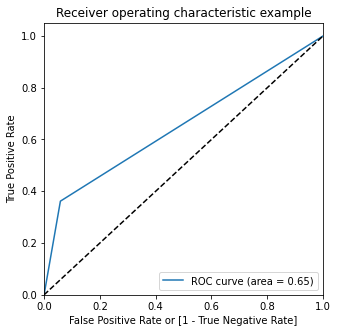

In [558]:
draw_roc(y_test, preds)

## XGBClassifier

In [559]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_sm, y_train)
preds = model.predict(X_test_sm)
metrics.accuracy_score(y_test, preds)

0.6657754010695187

Accuracy of overall model: 0.6657754010695187
              precision    recall  f1-score   support

           0       0.61      0.84      0.71       547
           1       0.77      0.50      0.60       575

    accuracy                           0.67      1122
   macro avg       0.69      0.67      0.66      1122
weighted avg       0.69      0.67      0.66      1122



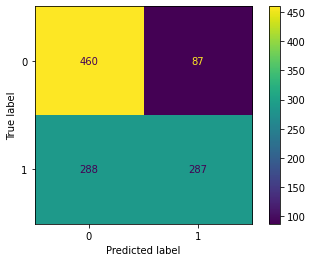

In [560]:
print("Accuracy of overall model: "+str(accuracy_score(y_test, preds))) #print('\n')
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [561]:
fpr,tpr,thresholds=metrics.roc_curve(y_test, preds,drop_intermediate=False)

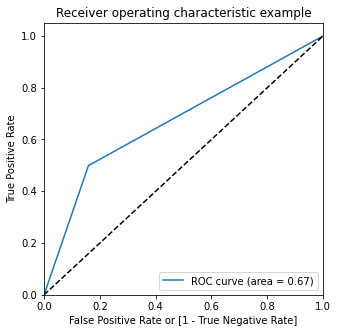

In [562]:
draw_roc(y_test, preds)